In [1]:
import pandas as pd
data=pd.read_csv("E:\\ASSIGNMENT FROM EXCELR\\Simple Linear Regression\\delivery_time.csv")

In [2]:
data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [4]:
data.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


In [8]:
from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler


In [9]:
scaler= MinMaxScaler(feature_range=(0,1))
rescaledX=scaler.fit_transform(data)

In [10]:
data1 = pd.DataFrame(rescaledX,columns=['DeliveryTime','SortingTime'])
data1

,DeliveryTime,SortingTime
0,0.619048,1.000
1,0.261905,0.250
2,0.559524,0.500
3,0.761905,0.875
4,1.000000,1.000
5,0.350000,0.500
6,0.523810,0.625
7,0.071429,0.125
8,0.471429,1.000
9,0.511905,0.875


E:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='DeliveryTime', ylabel='Density'>

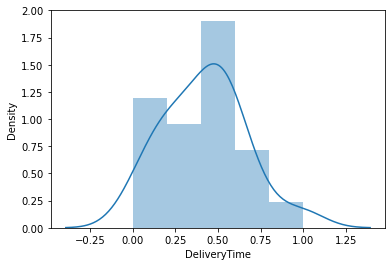

In [11]:
import seaborn as sns
sns.distplot(data1['DeliveryTime'])

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SortingTime', ylabel='Density'>

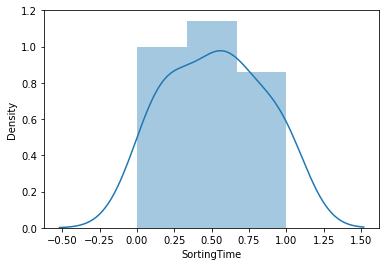

In [12]:
import seaborn as sns
sns.distplot(data1['SortingTime'])

# Fitting a Linear Regression Model

In [14]:
import statsmodels.formula.api as smf
model = smf.ols("DeliveryTime~SortingTime",data = data1).fit()

<AxesSubplot:xlabel='SortingTime', ylabel='DeliveryTime'>

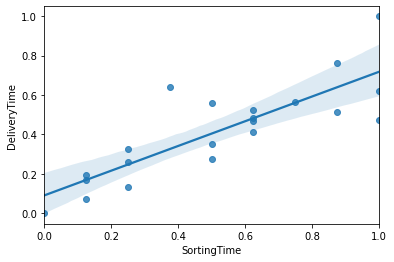

In [15]:
sns.regplot(x="SortingTime", y="DeliveryTime", data=data1)

In [16]:
#Coefficients
model.params
#params is parameters

Intercept      0.089561
SortingTime    0.628198
dtype: float64

In [17]:
model.summary()
#gives entire model summary
# we can use x.params, y.params

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           DeliveryTime   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Sat, 16 Jan 2021   Prob (F-statistic):           3.98e-06
Time:                        00:55:16   Log-Likelihood:                 12.578
No. Observations:                  21   AIC:                            -21.16
Df Residuals:                      19   BIC:                            -19.07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.0896      0.060      1.496      0.151      -0.036       0.215
SortingTime     0.6282      0.098      6.387      0.000       0.422       0.834
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         4.18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)

Intercept      1.496005
SortingTime    6.387447
dtype: float64 
 Intercept      0.151079
SortingTime    0.000004
dtype: float64


In [19]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

# prediction of new data

In [20]:
#Predict for 20 and 30 mins of sorting time
newdata=pd.Series([20,30])

In [21]:
data_pred=pd.DataFrame(newdata,columns=['SortingTime'])

In [22]:
model.predict(data_pred)

0    12.653522
1    18.935502
dtype: float64

In [23]:
#Predict for 20 and 30 mins of delivery time
newdata=pd.Series([20,30])

In [24]:
data_pred=pd.DataFrame(newdata,columns=['DeliveryTime'])

In [26]:
data_pred

,DeliveryTime
0,20
1,30
